# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from functions import cleaning 

In [2]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

# Loading dataset

In [3]:
filepath1 = '../Data/df_final_demo.txt' # Client Profiles
filepath2 = '../Data/df_final_web_data_pt_1.txt' # Digital Footprints, part 1
filepath3 = '../Data/df_final_web_data_pt_2.txt' # Digital Footprints, part 2
filepath4 = '../Data/df_final_experiment_clients.txt' # Experiment Roster 

# Loading datasets
df_clients = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)
df3 = pd.read_csv(filepath3)
df_roster = pd.read_csv(filepath4)

# Merging part 1 and 2 of Digital Footprints
df_trace = pd.concat([df2, df3], axis=0)

# Data cleaning

In [4]:
df_clients, df_trace, df_roster, df_clients_with_na = cleaning(df_clients, df_trace, df_roster)

# EDA

# Clients' profile

In [38]:
# According to the inital exploration, I will consider the numerical columns as numerical (for an analysis that will follow)
# and the others as categorical

# Creating a dataframe with categorical values
df_clients_ctgr = df_clients.select_dtypes("object")
# And creating a dataframe with numerical values
df_clients_nmr = df_clients.select_dtypes("number")

In [34]:
df_clients_nmr

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,bal
0,6,73,60.5,45105.30
1,7,94,58.0,110860.30
2,5,64,32.0,52467.79
3,16,198,49.0,67454.65
4,12,145,33.0,103671.75
...,...,...,...,...
70604,4,56,38.5,1411062.68
70605,12,148,31.0,101867.07
70606,16,198,61.5,40745.00
70607,21,255,68.0,475114.69


In [6]:
df_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38.5,U,3,1411062.68,5,5
70605,8981690,12,148,31.0,M,2,101867.07,6,6
70606,333913,16,198,61.5,F,2,40745.00,3,3
70607,1573142,21,255,68.0,M,3,475114.69,4,4


In [ ]:
# Having a look to data, to see main characteristics of clients

#### Univariate analysis

#### Clients' age

In [7]:
df_clients['clnt_age'].describe()

count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

In [8]:
print(df_clients['clnt_age'].var())
print(df_clients['clnt_age'].mode()[0])
print(df_clients['clnt_age'].max() - df_clients['clnt_age'].min()) # range

243.0877811418307
58.5
82.5


<Axes: xlabel='clnt_age', ylabel='Count'>

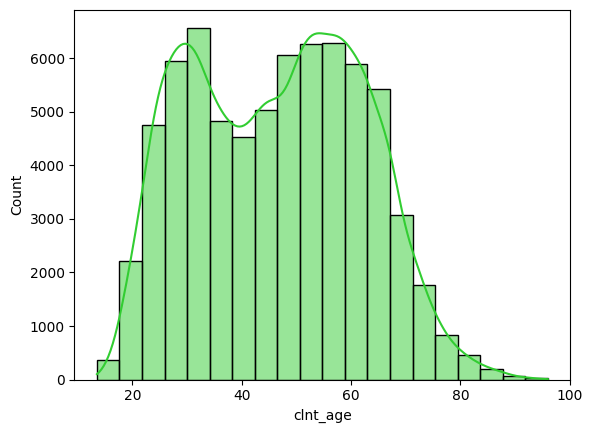

In [9]:
# "Spectral" sns.histplot(df['SalePrice'], kde=True, bins=30, color="salmon")
sns.histplot(df_clients['clnt_age'], kde=True, bins=20, color='limegreen')

<Axes: ylabel='clnt_age'>

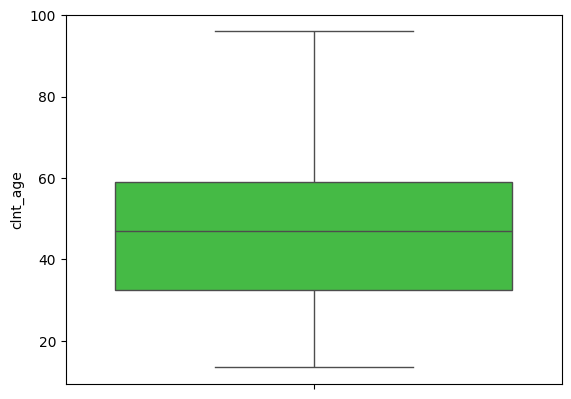

In [13]:
sns.boxplot(data=df_clients['clnt_age'], color='limegreen')

We observe from the boxplot that the clients' age doesn't have outliers.

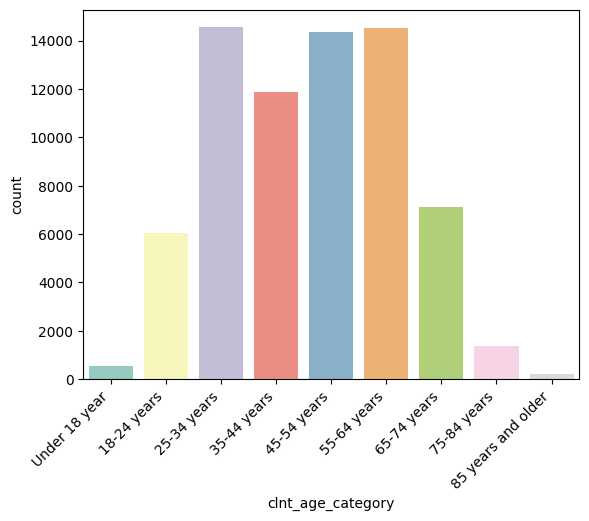

In [10]:
# I want to check the above with some age brackets
bins = [0, 18.0, 25.0, 35.0, 45.0, 55.0, 65.0 , 75.0, 85.0, df_clients['clnt_age'].max()]
labels = ['Under 18 year', '18-24 years', '25-34 years', '35-44 years', '45-54 years', 
          '55-64 years', '65-74 years', '75-84 years', '85 years and older']

df_clients['clnt_age_category'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels, include_lowest=True)


# Making a seaborn countplot
sns.countplot(data=df_clients, x='clnt_age_category', palette='Set3', hue='clnt_age_category', legend=False)
plt.xticks(rotation=45, ha='right')
plt.show()

It's notable that the clients predominantly fall into two age groups: 25-34 years and 45-64 years. Moreover, the interquartile range (IQR) reinforces this observation, spanning from 32 to 59 years, indicating that the majority of clients are concentrated within this age range.

#### Clients' tenure years

In [16]:
df_clients['clnt_tenure_yr'].describe()

count    70595.000000
mean        12.052950
std          6.871819
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64

In [17]:
print(df_clients['clnt_tenure_yr'].var())
print(df_clients['clnt_tenure_yr'].mode()[0])
print(df_clients['clnt_tenure_yr'].max() - df_clients['clnt_age'].min()) # range

47.221889582372256
6
48.5


<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

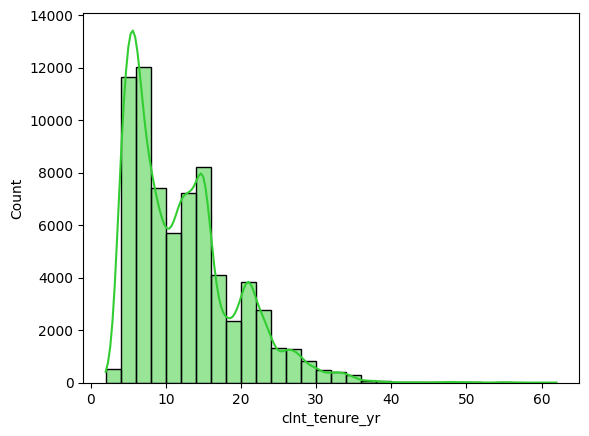

In [15]:
sns.histplot(df_clients['clnt_tenure_yr'], kde=True, bins=30, color='limegreen')

<Axes: ylabel='clnt_tenure_yr'>

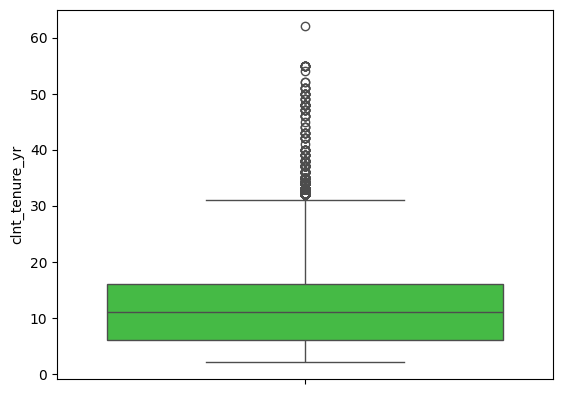

In [14]:
sns.boxplot(data=df_clients['clnt_tenure_yr'], color='limegreen')

The distribution of client tenure years is right skewed, and appears to have outliers with higher values. Although outliers are present, in the analysis they will be considered normal, since in the context of an investment management company there can be as long-term clients. The majority of clients have tenures ranging from approximately 6 to 16 years, as indicated by the interquartile range (IQR).

#### Client's gender

In [22]:
df_clients.gendr.value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

<Axes: xlabel='gendr', ylabel='count'>

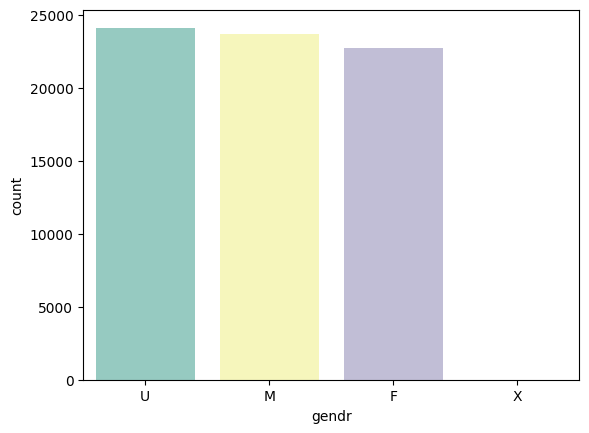

In [20]:
sns.countplot(data=df_clients, x='gendr', palette='Set3', hue='gendr', legend=False)

Based on the available data, excluding the unknown gender entries (including "U" and "X"), there appears to be a relatively balanced distribution between male and female clients.

#### Client's account balance

In [26]:
df_clients.bal.describe().apply(lambda x: f"{x:,.0f}")

count        70,595
mean        147,445
std         301,509
min          13,789
25%          37,347
50%          63,333
75%         137,545
max      16,320,040
Name: bal, dtype: object

In [57]:
df_clients.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'clnt_age_category'],
      dtype='object')

#### Interaction with company via call/ platform visit

<Axes: xlabel='calls_6_mnth', ylabel='count'>

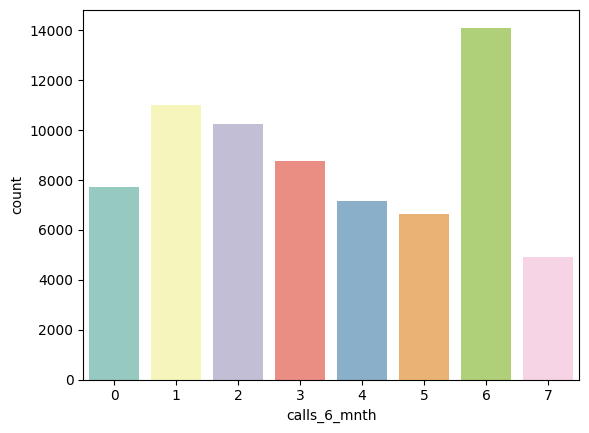

In [60]:
sns.countplot(data=df_clients, x='calls_6_mnth', palette='Set3', hue='calls_6_mnth', legend=False)

<Axes: xlabel='logons_6_mnth', ylabel='count'>

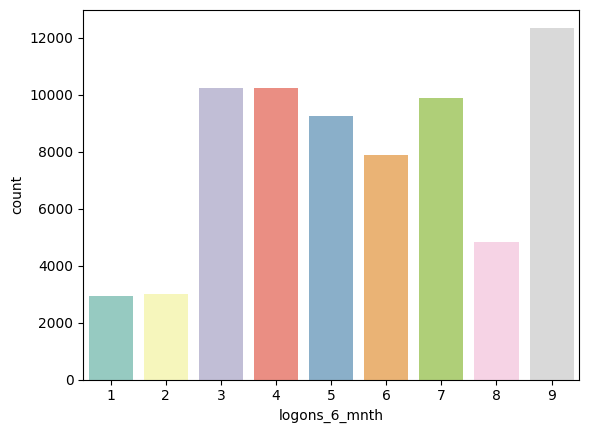

In [61]:
sns.countplot(data=df_clients, x='logons_6_mnth', palette='Set3', hue='logons_6_mnth', legend=False)

In [66]:
df_clients.logons_6_mnth.value_counts(normalize=True)*100

logons_6_mnth
9    17.494157
3    14.509526
4    14.476946
7    14.013740
5    13.108577
6    11.159431
8     6.813514
2     4.262342
1     4.161768
Name: proportion, dtype: float64

In [63]:
df_clients.logons_6_mnth.describe()

count    70595.000000
mean         5.566740
std          2.353286
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

The vast majority of the clients had some interaction with the company via call or platform visit the last 6 months.

#### Bivarate analysis

In [ ]:
# Numerical variables, correlation heatmap

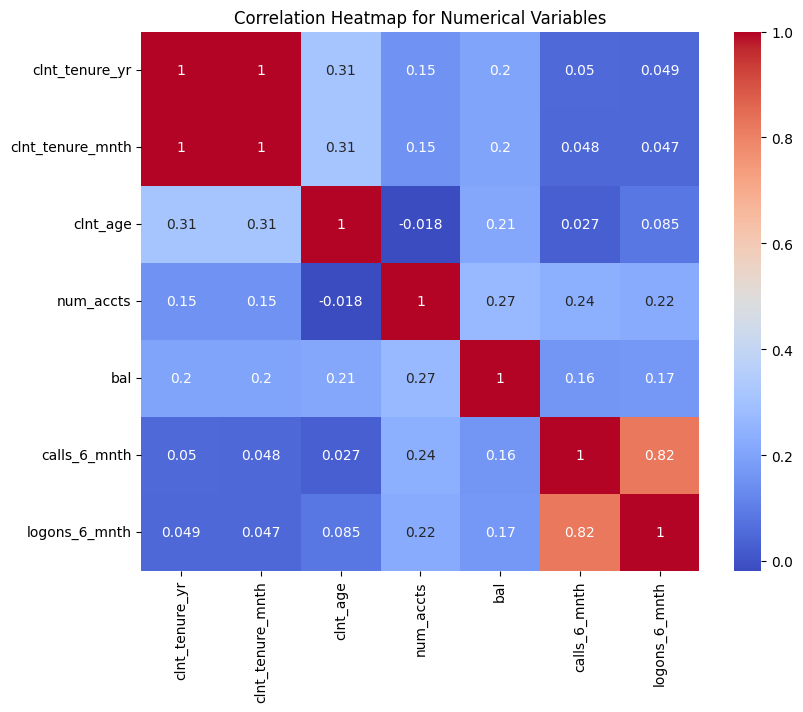

In [45]:
correlation_matrix = df_clients_nmr.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(9, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

With the Pearson correlation analysis, it appears that the most notable linear relationship exists between the number of logins to the site and the number of calls made by the customer within the last 6 months. 

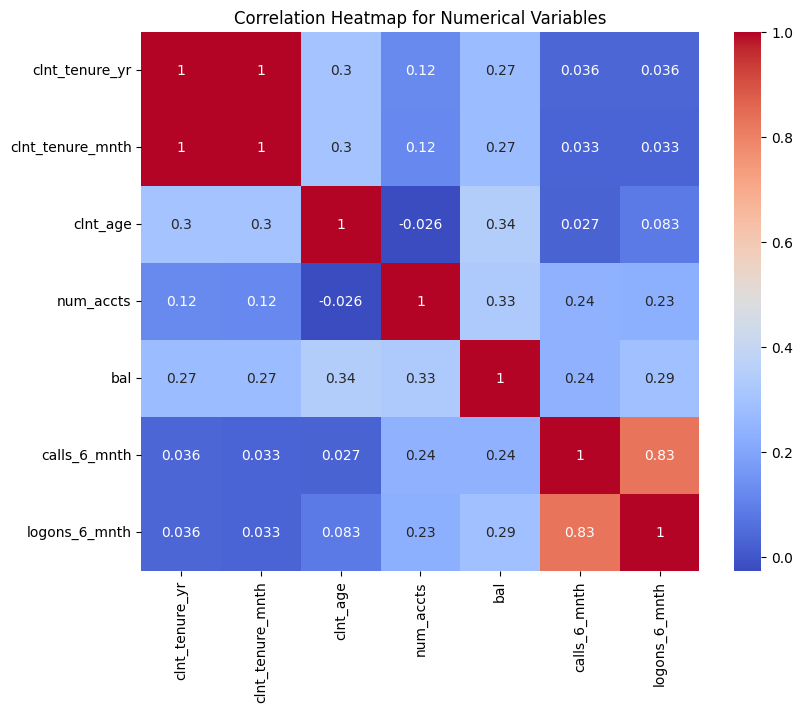

In [44]:
correlation_matrix_s = df_clients_nmr.corr(method='spearman')

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(9, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_s, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

The Spearman correlation analysis similarly indicates that the strongest association is observed between the number of logins and the number of calls made by customers in the last 6 months, and doesn't reveal any other strong correlation.

# Digital footprints

In [49]:
df_trace.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [53]:
df_trace[df_trace['visitor_id'] == '451664975_1722933822'] 
# better to take visitor_id or client_id into consideration, not visit_id
# clients might come back later to finish the process and that counts like a new visit_id

,client_id,visitor_id,visit_id,process_step,date_time
108605,3561384,451664975_1722933822,368621065_55513134501_466827,confirm,2017-04-25 13:22:14
108606,3561384,451664975_1722933822,368621065_55513134501_466827,step_3,2017-04-25 13:19:42
108607,3561384,451664975_1722933822,368621065_55513134501_466827,step_2,2017-04-25 13:19:20
108608,3561384,451664975_1722933822,368621065_55513134501_466827,step_1,2017-04-25 13:18:59
108609,3561384,451664975_1722933822,368621065_55513134501_466827,start,2017-04-25 13:18:45
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17


In [54]:
crosstab_result = pd.crosstab(df_trace['visitor_id'], df_trace['process_step'])
crosstab_result
# here I can replace the visitor_id with whether the test group they are, and see if there is any association there

process_step,confirm,start,step_1,step_2,step_3
visitor_id,,,,,
100011869_84756704576,0,2,1,1,1
100019786_4272121951,2,1,1,1,1
100026388_52569174348,1,4,2,1,1
100048572_12752788846,0,1,0,0,0
100052114_10880025650,0,1,1,0,0
...,...,...,...,...,...
999986924_89514756905,11,0,0,0,0
999993887_42794242929,0,1,0,0,0
999995931_60089148022,1,1,1,2,2


# Experiment roster

In [56]:
df_roster['variation'].value_counts()

variation
Test         26968
Control      23532
Undefined    20109
Name: count, dtype: int64